# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [649]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
# Study data files
mouse_metadata_path = r"C:\Users\ormis\Desktop\matplotlib-challenge\Resources\Mouse_metadata.csv"
study_results_path = r"C:\Users\ormis\Desktop\matplotlib-challenge\Resources\Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
full_study_df = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
full_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [650]:
# Checking the number of mice.
full_study_df["Mouse ID"].value_counts

<bound method IndexOpsMixin.value_counts of 0       b128
1       f932
2       g107
3       a457
4       c819
        ... 
1888    r944
1889    u364
1890    p438
1891    x773
1892    b879
Name: Mouse ID, Length: 1893, dtype: object>

In [651]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = full_study_df[full_study_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [652]:
# Optional: Get all the data for the duplicate mouse ID. 


In [653]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_duplicates_df = full_study_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep=False)

In [654]:
# Checking the number of mice in the clean DataFrame.
clean_duplicates_df["Mouse ID"].value_counts

<bound method IndexOpsMixin.value_counts of 0       b128
1       f932
2       g107
3       a457
4       c819
        ... 
1888    r944
1889    u364
1890    p438
1891    x773
1892    b879
Name: Mouse ID, Length: 1883, dtype: object>

In [655]:
summary_df.dtypes 

C:\Users\ormis\AppData\Local\Temp\ipykernel_14920\3570519584.py:1: FutureWarning: DataFrameGroupBy.dtypes is deprecated and will be removed in a future version. Check the dtypes on the base object instead
  summary_df.dtypes


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Drug Regimen,,,,,,,,
Capomulin,object,int64,float64,int64,object,object,int64,int64
Ceftamin,object,int64,float64,int64,object,object,int64,int64
Infubinol,object,int64,float64,int64,object,object,int64,int64
Ketapril,object,int64,float64,int64,object,object,int64,int64
Naftisol,object,int64,float64,int64,object,object,int64,int64
Placebo,object,int64,float64,int64,object,object,int64,int64
Propriva,object,int64,float64,int64,object,object,int64,int64
Ramicane,object,int64,float64,int64,object,object,int64,int64
Stelasyn,object,int64,float64,int64,object,object,int64,int64


## Summary Statistics

In [656]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_df=clean_duplicates_df.copy()
summary_df=summary_df.groupby(['Drug Regimen'])
tumor_volume_mean=summary_df.mean(numeric_only=True)['Tumor Volume (mm3)']
tumor_volume_median=summary_df.median(numeric_only=True)['Tumor Volume (mm3)']
tumor_volume_variance=summary_df.var(numeric_only=True)['Tumor Volume (mm3)']
tumor_volume_sem=summary_df.sem(numeric_only=True)['Tumor Volume (mm3)']
tumor_volume_sd=summary_df.std(numeric_only=True)['Tumor Volume (mm3)']
mean_median_df=pd.merge(tumor_volume_mean, tumor_volume_median, how="left", on=["Drug Regimen"])
mm_standard_dev_df=pd.merge(mean_median_df,tumor_volume_sd, how="left", on=["Drug Regimen"])
var_sem_df=pd.merge(tumor_volume_variance, tumor_volume_sem, how="left", on=["Drug Regimen"])
tumor_volume_merge=pd.merge(mm_standard_dev_df, var_sem_df, how="left", on=["Drug Regimen"])

tumor_volume_merge=tumor_volume_merge.rename(columns={"Tumor Volume (mm3)_x_x": "Mean Tumor Volume (mm3)", "Tumor Volume (mm3)_y_x": "Median Tumor Volume (mm3)",
                                                      "Tumor Volume (mm3)_x_y": "Variance Tumor Volume (mm3)","Tumor Volume (mm3)_y_y": "SEM Tumor Volume (mm3)",
                                                      "Tumor Volume (mm3)": "St. Dev Tumor Volume (mm3)"})
tumor_volume_merge.head(15)
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),St. Dev Tumor Volume (mm3),Variance Tumor Volume (mm3),SEM Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.458254,50.854632,6.637293,44.053659,0.540135
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


In [657]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

[Text(0.5, 0, 'Drug Regimen'), Text(0, 0.5, 'Data Points')]

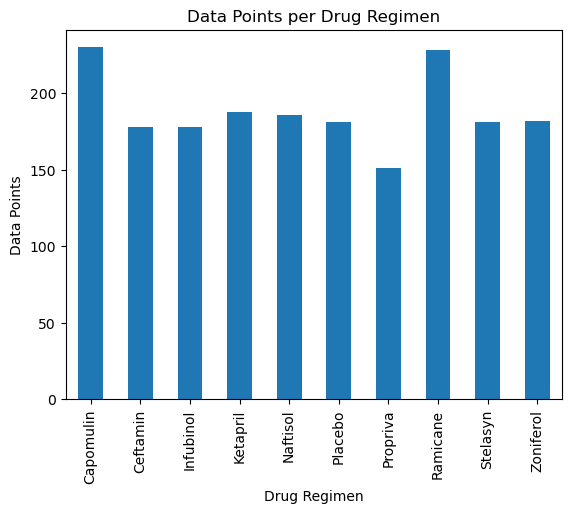

In [658]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_chart_title = "Data Points per Drug Regimen"
x_label = "Drug Regimen"
y_label = "Data Points"

bar_chart_db = clean_duplicates_df.copy()
bar_chart_db = clean_duplicates_df.groupby(['Drug Regimen'])
data = bar_chart_db.count()

column_name = data.columns[0]
data = data.rename(columns={column_name: 'Number of Data Points'})
graph = data.plot.bar(y= 'Number of Data Points', title=bar_chart_title, legend=False)
graph.set(xlabel=x_label, ylabel=y_label)

Text(0, 0.5, 'Data Points')

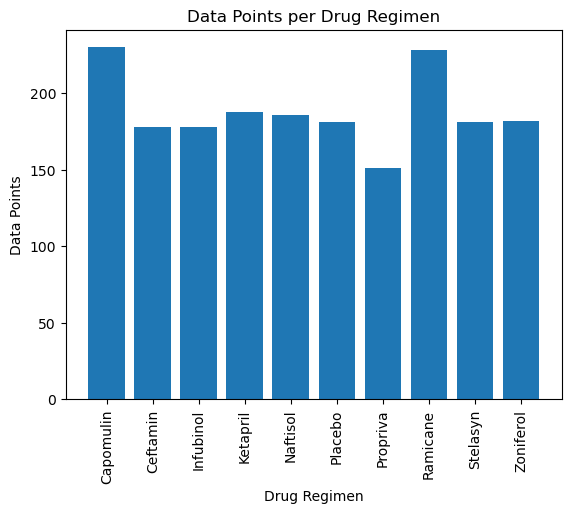

In [659]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(data.index))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, data['Number of Data Points'])
plt.xticks(tick_locations, data.index, rotation="vertical")

plt.title(bar_chart_title)
plt.xlabel(x_label)
plt.ylabel(y_label)

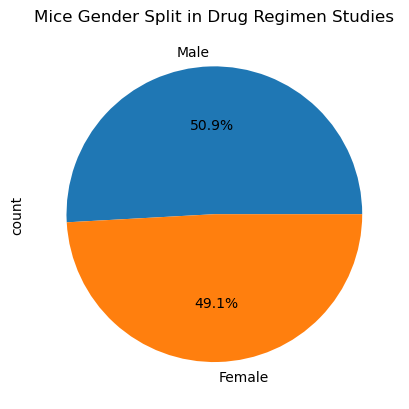

In [660]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_chart = clean_duplicates_df["Sex"].value_counts()
plt.title("Mice Gender Split in Drug Regimen Studies")
gender_chart.plot.pie(autopct= "%1.1f%%")
plt.show()



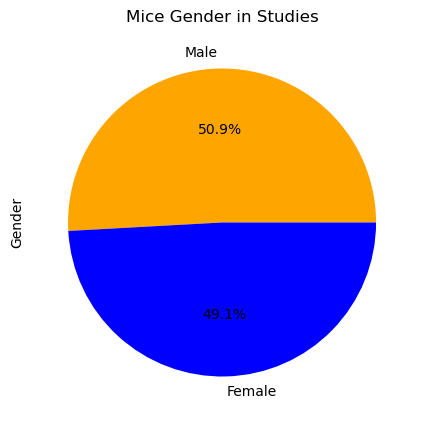

In [661]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = gender_chart.index
colors=["orange", "blue"]
plt.figure(figsize=(5,5))
plt.pie(gender_chart, labels=labels, colors=colors, autopct="%1.1f%%")
plt.title("Mice Gender in Studies")
plt.ylabel("Gender")
plt.show()

## Quartiles, Outliers and Boxplots

In [662]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_df=clean_duplicates_df.loc[clean_duplicates_df["Drug Regimen"] == "Capomulin",:]
ramicane_df=clean_duplicates_df.loc[clean_duplicates_df["Drug Regimen"] == "Ramicane", :]
infubinol_df=clean_duplicates_df.loc[clean_duplicates_df["Drug Regimen"] == "Infubinol", :]
ceftamin_df=clean_duplicates_df.loc[clean_duplicates_df["Drug Regimen"] == "Ceftamin", :]
# Start by getting the last (greatest) timepoint for each mouse
capomulin_last = capomulin_df.groupby('Mouse ID').max()['Timepoint']
capomulin_tumor=pd.DataFrame(capomulin_last)
capomulin_merge=pd.merge(capomulin_tumor, clean_duplicates_df, how="left", on=("Mouse ID", "Timepoint"))
capomulin_merge.head()                         

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22


In [663]:
ramicane_last = ramicane_df.groupby('Mouse ID').max()['Timepoint']
ramicane_tumor=pd.DataFrame(ramicane_last)
ramicane_merge=pd.merge(ramicane_tumor, clean_duplicates_df, how="left", on=("Mouse ID", "Timepoint"))
ramicane_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a411,45,38.407618,1,Ramicane,Male,3,22
1,a444,45,43.047543,0,Ramicane,Female,10,25
2,a520,45,38.810366,1,Ramicane,Male,13,21
3,a644,45,32.978522,1,Ramicane,Female,7,17
4,c458,30,38.342008,2,Ramicane,Female,23,20


In [664]:
infubinol_last = infubinol_df.groupby('Mouse ID').max()['Timepoint']
infubinol_tumor = pd.DataFrame(infubinol_last)
infubinol_merge = pd.merge(infubinol_tumor, clean_duplicates_df, how="left", on=("Mouse ID", "Timepoint"))
infubinol_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a577,30,57.031862,2,Infubinol,Female,6,25
3,a685,45,66.083066,3,Infubinol,Male,8,30
4,c139,45,72.226731,2,Infubinol,Male,11,28


In [665]:
ceftamin_last = ceftamin_df.groupby('Mouse ID').max()['Timepoint']
ceftamin_tumor=pd.DataFrame(ceftamin_last)
ceftamin_merge = pd.merge(ceftamin_tumor, clean_duplicates_df, how="left", on=("Mouse ID", "Timepoint"))
ceftamin_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a275,45,62.999356,3,Ceftamin,Female,20,28
1,b447,0,45.000000,0,Ceftamin,Male,2,30
2,b487,25,56.057749,1,Ceftamin,Female,6,28
3,b759,30,55.742829,1,Ceftamin,Female,12,25
4,f436,15,48.722078,2,Ceftamin,Female,3,25


In [666]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimen_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
all_drugs = clean_duplicates_df[clean_duplicates_df["Drug Regimen"].isin(drug_regimen_list)]
all_drugs.head()

timepoint_list = all_drugs.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_vol=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
timepoint_list = timepoint_list.stack(level=0).unstack(level=0)
for drug in drug_regimen_list:
    print(drug)
                                                                    

# Create empty list to fill with tumor vol data (for plotting)
drug_study = 0
for drug in drug_regimen_list:
    quartiles = timepoint_list[drug].quantile([0.25, 0.5, 0.75]).round(3)
    lowerq=quartiles.loc[0.25]
    upperq=quartiles.loc[0.75]
    iqr=upperq-lowerq
    lower_bound=(lowerq - (float(1.5) * float(iqr)))
    upper_bound=(upperq + (float(1.5) * float(iqr)))

    if drug_study == 0:
        print(f"--------------------------------------------------)")
        print(f"The lower quartile of {drug} treatments is: {lowerq}.")
        print(f"The upper quartile of {drug} treatments is: {upperq}.")
        print(f"The interquartile range of {drug} treatments is: {iqr}.")
        print(f"Values under {lower_bound} coud be outliers for {drug}.")
        print(f"Values above {upper_bound} could be outliers for {drug}.")
        print(f"------------------------------------------------------")
drug_study+=1
    


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin
Ramicane
Infubinol
Ceftamin
--------------------------------------------------)
The lower quartile of Capomulin treatments is: 32.377.
The upper quartile of Capomulin treatments is: 40.159.
The interquartile range of Capomulin treatments is: 7.7819999999999965.
Values under 20.704000000000008 coud be outliers for Capomulin.
Values above 51.831999999999994 could be outliers for Capomulin.
------------------------------------------------------
--------------------------------------------------)
The lower quartile of Ramicane treatments is: 31.56.
The upper quartile of Ramicane treatments is: 40.659.
The interquartile range of Ramicane treatments is: 9.099.
Values under 17.911499999999997 coud be outliers for Ramicane.
Values above 54.3075 could be outliers for Ramicane.
------------------------------------------------------
--------------------------------------------------)
The lower quartile of Infubinol treatments is: 54.049.
The upper quartile of Infubinol treatments is: 65

<function matplotlib.pyplot.show(close=None, block=None)>

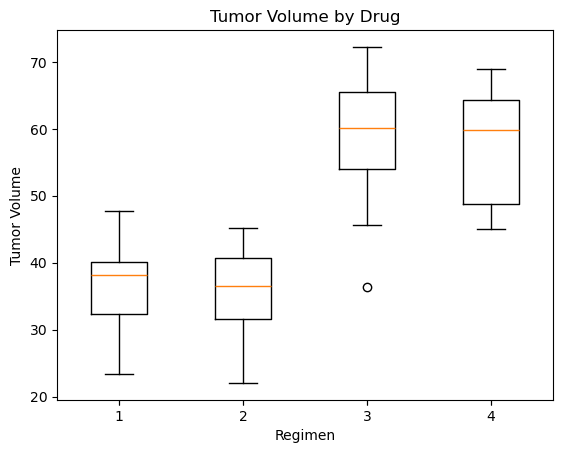

In [667]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot = []

for drug in drug_regimen_list:
    boxplot.append(list(timepoint_list[drug].dropna()))

fig = plt.figure()
plt.xlabel("Regimen")
plt.xticks([1,2,3,4], drug_regimen_list, rotation = 0)
plt.ylabel("Tumor Volume")
plt.title("Tumor Volume by Drug")
plt.boxplot(boxplot)
plt.show

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

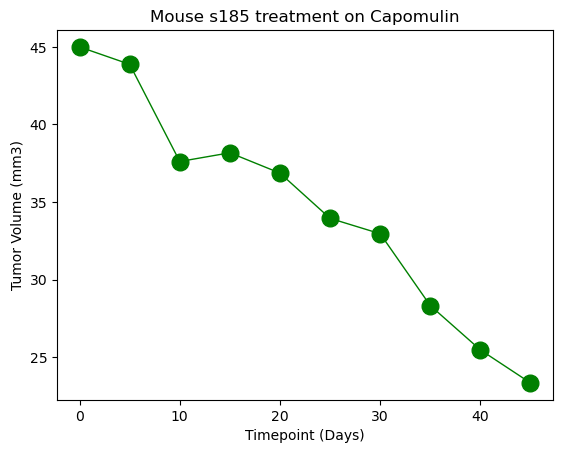

In [668]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185", :]
line_df.head()
x_axis = line_df["Timepoint"]
tumor_size = line_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Mouse s185 treatment on Capomulin')
plt.plot(x_axis, tumor_size, linewidth = 1, markersize = 12, marker = "o", color="green")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

Text(0, 0.5, 'Average Tumor Volume (mm3)')

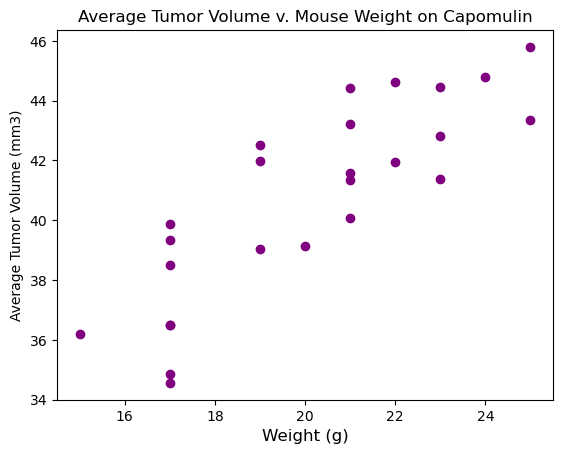

In [671]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
fig1, ax1 = plt.subplots()
capo_volume = capomulin_df.groupby(['Mouse ID']).mean(numeric_only=True)

marker_size = 12
plt.scatter(capo_volume['Weight (g)'], capo_volume['Tumor Volume (mm3)'], color="purple")
plt.title('Average Tumor Volume v. Mouse Weight on Capomulin')
plt.xlabel('Weight (g)', fontsize =12)
plt.ylabel('Average Tumor Volume (mm3)')

## Correlation and Regression

In [673]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corre = st.pearsonr(capo_volume['Weight (g)'], capo_volume['Tumor Volume (mm3)'])
print(f"Correlation of mouse weight and average tumor volume is {round(corre[0],2)}")

Correlation of mouse weight and average tumor volume is 0.84


R-squared is: 0.7088568047708723


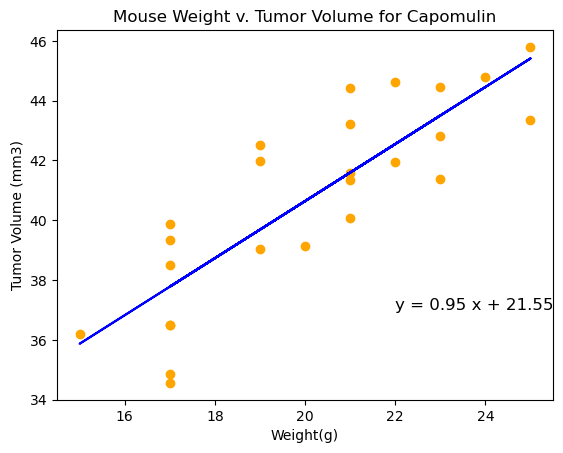

In [677]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capo_volume["Weight (g)"], capo_volume["Tumor Volume (mm3)"])
regress = capo_volume["Weight (g)"]* slope + intercept
line = f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(capo_volume["Weight (g)"], capo_volume["Tumor Volume (mm3)"], color="orange")
plt.plot(capo_volume["Weight (g)"], regress, color = "blue")
plt.annotate(line, (22,37), fontsize=12)
plt.xlabel("Weight(g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse Weight v. Tumor Volume for Capomulin")
print(f"R-squared is: {rvalue**2}")
plt.show()